In [ ]:
import torch

In [ ]:
# 텐서 다루기
# 1.리스트로 텐서 생성
# 1.1 0차원 텐서(스칼라)
import torch 
from typing import List # 앞에가 대문자 L이면 클래스다.
# 파이썬 리스트: [],list() --> 리스트를 생성하는 --> 오브젝트 생성--> 클래스 존재(list)
scalar_tensor = torch.tensor(7) # 단일값 들어갔으니 스칼라다
print(scalar_tensor.shape) # 다시복습: torch는 넘파이 아니다!! numpy의 shape 은 쓸수 있지만 결과는 다름
print(scalar_tensor.ndim) # 차원


# 1.2 1차원 텐서(벡터)
# list1d는 아무거나 받을 수 있음! 리스트만 받는게 아님

list1d:List[int] = [1,2,3,4] # 이거하면 에러 안날 수 있음, agent 한테 정확하게 인지할 수 있게 만들 수 있음
                             # 리스트에 인트를 저장할 수 있는 리스트라고 확인할 수 있음

tensor_1d = torch.tensor(list1d) # 리스트가 텐서로 변환함(주의!! 복사해서!!! 변환함거임)
print(tensor_1d.shape)
print(tensor_1d.ndim)

# 1.3 2차원 텐서(행렬)
list2d:List[List[int]] = [[1,2,3,4],[5,6,7,8]]
tensor_2d = torch.tensor(list2d)
print(tensor_2d.shape)
print(tensor_2d.ndim)

# 결국 list가지고 텐서를 생성할 수 있다.

# 1.4 다차원 텐서 생성 가능

import numpy as np


aaa = [1,2.0,np.nan] # 만약 문자열 'a'를 넣으면 에러남
                        # nan은 무한대 수를 의미해 괜찮음
bbb = torch.tensor(aaa) # 자동으로 큰놈(float)으로 변환됨
print(bbb)
print(bbb.shape)
print(bbb,np.__version__) # 버전 확인  
                          # 오픈소스라서 버전 다를 수 있음

torch.Size([])
0
torch.Size([4])
1
torch.Size([2, 4])
2
tensor([1., 2., nan])
torch.Size([3])
tensor([1., 2., nan]) 2.2.6


In [ ]:
# 2.ndarray와 tensor 간의 변환(데이터 복사)
# 2.1 ndarray 생성(2차원:행렬)
numpy_array = np.array([
    
    [1.0,2.0,3.0],
    [4.0,5.0,6.0]
    
    ],dtype=np.float64) 

# 텐서랑 넘파이랑 똑같지만 같지 않다...결국 넘파이를 가져다가 새로 만들었다.
print(numpy_array)

# 뜨헉: 콤마가 없다.....!

print(numpy_array.ctypes.data) # 메모리 위치
                               # 나중에 data를 메모리 단위에서 제어할수 도 있어서 그럼
                               # 메모리 주소를 가져올 수 있다.바로 그곳에 접근 가능함

print(numpy_array.dtype)
# 2.2 tensor 변환
tensor_from_numpy= torch.tensor(numpy_array) # naming 룰은 프로젝트 마다 다르다.
                                             # 회사가면 먼저 해야할일 문서주세요~~~!!!
                                             # 언더바 하나도 맘대로 주면 안됨 --> 달라고 해야함, 물어봐야함!
print(tensor_from_numpy)
print(tensor_from_numpy.dtype)

# 텐터에서 주소값 가져오기
# ptr: pointer 
print(tensor_from_numpy.data_ptr())
# 넘파이의 주소값과 다르다, 복사해서 변환해서 다르다.

print(numpy_array)
print(numpy_array[0][0])
numpy_array[0][0]=99.0
print(numpy_array[0][0])


print(tensor_from_numpy)

[[1. 2. 3.]
 [4. 5. 6.]]
100675715768064
float64
tensor([[1., 2., 3.],
        [4., 5., 6.]], dtype=torch.float64)
torch.float64
100675715936000
[[1. 2. 3.]
 [4. 5. 6.]]
1.0
99.0
tensor([[1., 2., 3.],
        [4., 5., 6.]], dtype=torch.float64)


In [38]:
# 3.텐서 속성(dtype,device)확인
# 사용할 장치를 동적으로 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 
print(device)

# 1.정수 리스트를 float32 타입의 CPU 텐서로 생성
# 딥러닝 모델의 입력이나 가중치는 대부분 float32를 사용합니다. 기억해주세요~!!
data_int = [1,2,3]
tensor_gpu_float32 = torch.tensor(data_int,dtype=torch.float32,device='cuda') # device=device도 되고 device='cuda'도 되고   
print(tensor_gpu_float32.dtype)
print(tensor_gpu_float32.device)   

# 근데 아직까지 CPU다


cuda
torch.float32
cuda:0


In [47]:
# 2.실수리스트를 int32 타입의 CPU 텐서를 생성
data_float = [1.1,2.2,3.3]
tensor_cpu_int32 = torch.tensor(data_float,dtype=torch.int32)
print(tensor_cpu_int32)
print(tensor_cpu_int32.dtype)
print(tensor_cpu_int32.device)   




tensor([1, 2, 3], dtype=torch.int32)
torch.int32
cpu


In [ ]:
# 3.Boolean 텐서를 GPU 에 생성 
# 불린 -->언어 모델에서 엄청 많이 쓰임~~~~!!! ,다룰줄 알아야함
data_bool = [True,False,True]
tensor_gpu_bool = torch.tensor(data_bool,device='cuda')
print(tensor_gpu_bool) #dtype 안줘도 자동추론됨  원래) dtype=torch.bool 은 자동 추론되서 처리된다.
print(tensor_gpu_bool.device) #이제 GPU에 생성됨



tensor([ True, False,  True], device='cuda:0')
cuda:0


In [ ]:
# zero랑 ones() --> 많이 쓰임
# 특정 크기의 값으로 생성:zeros,ones
# 1.기본 사용법 : 3 X 4 크기의 모든 요소가 0인 float32의 텐서 생성
# default => dtype: float32
zeros_tensor_float32 = torch.zeros(3,4) # 크기와 값은 생성됨
print(zeros_tensor_float32)
print(zeros_tensor_float32.dtype)
print(zeros_tensor_float32.shape)
# zeros 는 디폴트가 float32다.

print('---------------------------------------------------------')
# 2. 2 2 3 크기의 모든요소가 1인 int8 타입의 GPU텐서 생성
# ones_tensor_int8 = torch.ones(2,2,3,dtype=torch.int8,device='cuda')
ones_tensor_int8 = torch.ones(2,2,3,device='cuda',dtype=torch.int8)
print(ones_tensor_int8)
print(ones_tensor_int8.dtype)
print(ones_tensor_int8.shape)

print('----------------실무활용예제:이미지------------------------')
# 이미지를 텍스트로 바꿀때 주의할점: 상,하,좌,우를 따져야 한다.
# 마스킹:불린사용해서 구역 구분 / 일반 언어모델에서 마스킹함

# 이미지처리: 마스크를 사용하여 이미지의 일부분을 처리할 때 사용
# 가상 이미지 텐서 생성:(배치크기(장수), 채널(칼라), 높이, 너비)
# 배치사이즈: 한번에 연산에 들어갈 크기
# 10장 이미지 처리, 흑백:(10,1,100,100)
# 10: 이미지갯수,10장
# 1: 흑백
# 100: 이미지 높이
# 100: 이미지 너비

images_tensor = torch.randn(1,3,256,256) # 1장,칼라,크기(256,256)
# print(images_tensor) # 큰 값이 나옴

# 특정 영역을 지정 clip
mask = torch.zeros(256,256,dtype=torch.bool) # 이미지를 덮을수 있는 마스크를 생성했다,이게 이미지 삭제다
                                             # 불린 으로 바꾼이유 --> 불린 인덱싱할려고
                                             # 0 -> False, 1 -> True 
print(mask) # 다 0.0으로 채워짐

# 보이고자 하는 영역을 지정:True
mask[100:150,100:150] = True # 100~150 사이의 값을 True로 변경 , True 영역에만 이미지가 나타난다.(Clipping:원래 False 였던 놈을 저 영역만 화면에 보여진다)
mask[98:102,98:102] = True # 100~150 사이의 값을 True로 변경 , True 영역에만 이미지가 나타난다.(Clipping:원래 False 였던 놈을 저 영역만 화면에 보여진다)
# 트랜스포머에서 어떻게 쓰이는지:  중간에 빈 단어 찾기
print(mask)




tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
torch.float32
torch.Size([3, 4])
---------------------------------------------------------
tensor([[[1, 1, 1],
         [1, 1, 1]],

        [[1, 1, 1],
         [1, 1, 1]]], device='cuda:0', dtype=torch.int8)
torch.int8
torch.Size([2, 2, 3])
----------------실무활용예제:이미지------------------------
tensor([[False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        ...,
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False]])


In [76]:
# 랜덤 처리 : torch.rand(),torch.randn(),torch.randint()

# torch.rand() : 0과 1사의 균등분포에서 랜덤하게 추출
# torch.randn() : 평균이 0, 표준편차가 1인 표준 정규분포에서 값으로 추출
# torch.randint() : 주어진 범위 내의 정수를 균등분포로 추출,인덱스를 랜덤하게 샘플링할때 사용

# 시각화
import matplotlib.pyplot as plt
import numpy as np

# torch.rand() 시각화
rand_tensor = torch.rand(100000) # 0의 갯수가 많아질수록 1이에 가까워짐
                                 # 0 ~ 1사이의 값이 나옴
torch.manual_seed(42) # 랜덤값으로 고정
# print(rand_tensor)
print(rand_tensor.shape) # 1차원으로 나옴
print(rand_tensor.min()) # 최소값

print(rand_tensor.max())


torch.Size([100000])
tensor(2.2054e-06)
tensor(1.0000)


tensor([-1.8057,  0.6236,  2.1518,  ...,  1.1697, -0.9114, -1.1900])
torch.Size([1000000])
tensor(-4.6114)
tensor(4.8355)
tensor(-0.0006) tensor(1.0000)
torch.Size([1000000])
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([[72, 98, 25],
        [82, 17, 12]])


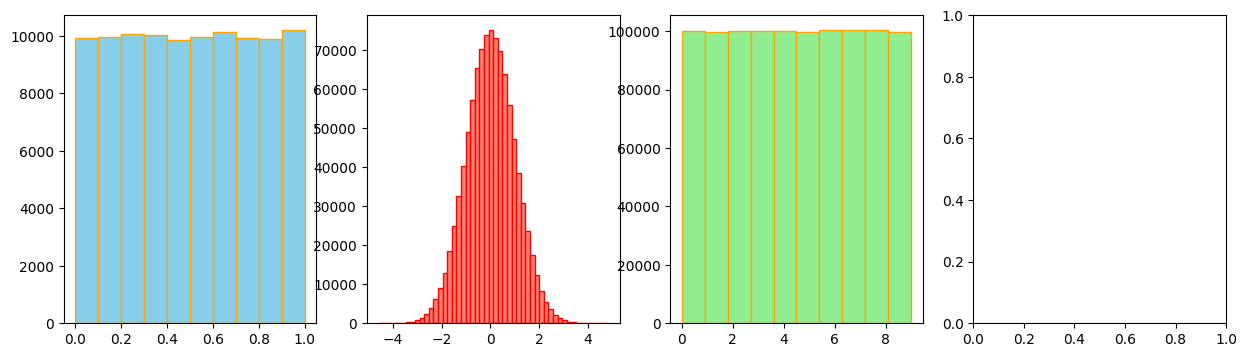

In [ ]:
# 2.torch.randn()
randn_tensor = torch.randn(1000000)
print(randn_tensor)
print(randn_tensor.shape)
print(randn_tensor.min())
print(randn_tensor.max())   

print(randn_tensor.mean(),randn_tensor.std()) # 소수점 연산의 오류는 있을 수 있다.

# randint : 0(포함)부터 10까지의 정수중 랜덤하게 10000개 선택
# 0은 포함하지만 마지막 10은 미포함
randint_tensor = torch.randint(low=0,high=10,size=(1000000,)) # 사이즈는 튜플로 주면 됨  
print(randint_tensor.shape) 
print(randint_tensor.unique()) # 중복된 값은 제외

# 2차원 randint: 2 X 3, 0~100사이 까지의 값으로
randint_matrix = torch.randint(0,100,(2,3))
print(randint_matrix)

# 시각화
fig,axes = plt.subplots(1,4,figsize=(15,4)) # 1행 3열의 subplot 생성 
axes[0].hist(rand_tensor,bins=10,color="skyblue",edgecolor="orange") # 균든분포 :갯수가 많아질수록 평평하다 , 갯수가 많을수록 분포를 따른다.
                                                                     # 균둥분포: 쪼개질 확률, 쪼개진만큼의 확률값이 나옴
axes[1].hist(randn_tensor,bins=50,color="salmon",edgecolor="red") # 정규분포: 
axes[2].hist(randint_tensor,bins=10,color="lightgreen",edgecolor="orange") 
# axes[3].hist(randint_tensor,bins=10,color="skyblue",edgecolor="orange") 
                                                                      # 데이터가 많을수록 균등분포를 따른다.



plt.show()  

In [ ]:
# 2장은 진짜 중요하다, 바짝 체크해야함, 코딩 다시하고 외워야함
# 22page 재현성 확보 코드

import torch

# 1. 시드(seed)를 42로 설정
torch.manual_seed(42) # manual은 수동으로 설정
# 시드값만 똑같으면 똑같은 결과가 나옴
rand1 = torch.rand(2, 2)
print(f"Random tensor with seed 42:\n{rand1}")


# 2. 시드 설정 없이 다시 생성 (이전 상태에 이어서 생성)
rand2 = torch.rand(2, 2)
print(f"\nNext random tensor:\n{rand2}")


# 3. 시드를 다시 42로 설정
torch.manual_seed(42)
rand3 = torch.rand(2, 2)
print(f"\nRandom tensor with seed 42 again:\n{rand3}")


Random tensor with seed 42:
tensor([[0.8823, 0.9150],
        [0.3829, 0.9593]])

Next random tensor:
tensor([[0.3904, 0.6009],
        [0.2566, 0.7936]])

Random tensor with seed 42 again:
tensor([[0.8823, 0.9150],
        [0.3829, 0.9593]])


In [122]:
# 시퀀스값 텐서 생성
# torch.arange(),torch.linspace(),torch.logspace() 
# 시퀀스라는 단어 들어가면 --> 순서다.

# 1.torch.arange() : 주어진 간격(step)으로 균일하게 증가하는 시퀀스값 생성
# arange(start,end,step)
arange_tensor = torch.arange(0,10,2) # start: 시작값, end: 종료값, step: 간격
print(arange_tensor)

# 2.torch.linspace() : 주어진 구간을 원하는 갯수(step)로 균일하게 분할(끝점 포함)
# linspace(start,end,steps)
# linspace_tensor(start,end,steps) --> [start,...,end]텐서
linspace_tensor = torch.linspace(0,10,steps=5)  #step은 구간의 갯수, arange 랑 다름
# start: 시작값, end: 종료값, steps: 간격

print(linspace_tensor) 

# 3.torch.logspace()


tensor([0, 2, 4, 6, 8])
tensor([ 0.0000,  2.5000,  5.0000,  7.5000, 10.0000])


In [ ]:
# 원래 텐서 생성되야함 : 크기(2,3),float64,cuda
original_tensor = torch.randn(2,3,dtype=torch.float64,device='cuda')
# 0부터 1까지 랜덤값나옴, 근데 0은 안나옴
print(original_tensor)
print(original_tensor.dtype)
print(original_tensor.device)

# zeros_like
zeros_like_tensor = torch.zeros_like(original_tensor)
print(zeros_like_tensor)
print(zeros_like_tensor.shape)
print(zeros_like_tensor.dtype)
print(zeros_like_tensor.device)

# ones_like
ones_like_tensor = torch.ones_like(original_tensor)
print(ones_like_tensor)
print(ones_like_tensor.shape)
print(ones_like_tensor.dtype)
print(ones_like_tensor.device)

# rand_like
rand_like_tensor = torch.rand_like(original_tensor)
print(rand_like_tensor)
print(rand_like_tensor.shape)
print(rand_like_tensor.dtype)
print(rand_like_tensor.device)

# AI 도움은 나중에 받는걸로...



tensor([[-0.7254,  0.3085, -0.0793],
        [ 0.3490, -0.8810, -0.1884]], device='cuda:0', dtype=torch.float64)
torch.float64
cuda:0
tensor([[0., 0., 0.],
        [0., 0., 0.]], device='cuda:0', dtype=torch.float64)
torch.Size([2, 3])
torch.float64
cuda:0
tensor([[1., 1., 1.],
        [1., 1., 1.]], device='cuda:0', dtype=torch.float64)
torch.Size([2, 3])
torch.float64
cuda:0
tensor([[0.4369, 0.1778, 0.3861],
        [0.6229, 0.7917, 0.9636]], device='cuda:0', dtype=torch.float64)
torch.Size([2, 3])
torch.float64
cuda:0


In [ ]:
# 텐서 중요 속성 다루기
# 교재에 있는 코드는 의미는 없지만 속성들은 중요하니까 봐야함
# 3X5 크기의 float32 타입의 텐서 생성,gpu 사용,미분가능
# 텐서단위로 미분할 수 있다!!!
import torch
tensor_ = torch.randn(3,5,dtype=torch.float32,device=device, requires_grad=True)  # 신경망에 바로 들어가 사용 가능

print(tensor_.requires_grad)
print(tensor_.is_leaf) # 현재는 의미없다. 왜 ? 하나밖에 없어서 이미 나무에 잎이 하나밖에 없어서, 나중에 끝을 따질때가 있다.....
                       # 그리고 leaf 가 여러개 있을수도 있다.

# 계산그래프:텐서와 텐서를 연산하도록 하는것


In [ ]:
# 리눅스의 도커란
# 텐서의 인덱싱, 슬라이싱: 추출
import torch

# 4X5 크기의 텐서 생성
# x = torch.arange(20) # 1차원 , 이렇게 하면 start:0,step:1
# print(x)

x = torch.arange(20).reshape(4,5)
# x = torch.arange(20).reshape(4,-1) 도 같은 의미임
print(x)

# 1. 단일 요소 접근: (0-based index) 1행 2열의 요소, x[행,열]
print(x[1,2]) # 인덱싱 --> 단일값 --> 스칼라텐서 tensor(7)

# 2. 행 전체 슬라이싱: 인덱스가 2인행 전체 
print(x[2,:])
print(x[2])

# 3. 열 전체 슬라이싱: 3열 전체 가져옴
print(x[:,3]) # 1차원으로 나옴

# 부분 슬라이싱 : 1~2행, 2~3열
# print(x[1:2, 2:3]) # 슬라이싱 하면 단일값 나와도 일차원이다.
print(x[1:3, 2:4]) # 2차원으로 나옴

# 코드 몇줄 안되지만 엄~~~~~~~~~~~청 중요함

# 5.Boolean인덱싱 : 10보다 큰 요소만 선택
mask = x > 10 # 조건 정리
print(mask)
print(x[mask]) # True 인것만 나옴, 1차원으로 나옴<중요> , 나중에 reshape 해야함
               # 특정 음성,이미지만 나오게끔 -> 그 영역의  값만 볼 수 있다.
               



tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]])
tensor(7)
tensor([10, 11, 12, 13, 14])
tensor([10, 11, 12, 13, 14])
tensor([ 3,  8, 13, 18])
tensor([[ 7,  8],
        [12, 13]])
tensor([[False, False, False, False, False],
        [False, False, False, False, False],
        [False,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True]])
tensor([11, 12, 13, 14, 15, 16, 17, 18, 19])


In [ ]:
# 텐서 이어 붙이기
# t1 = torch.arange(6)        # arange(0,6,1) => [0,1,2,3,4,5]
# t2 = torch.arange(6,12)     # arange(6,12,1)  => [6,7,8,9,10,11]

t1 = torch.arange(6).reshape(2,3)  # 2행 3열로 만들겠다.
t2 = torch.arange(6,12).reshape(2,3)

print(t1)
print(t2) # 2차원 출력 -> 축이 들어감

# 1.dim=0 : 행 따라 붙인다.
cat_dim0 = torch.cat([t1,t2],dim=0)
print(cat_dim0)

# 2.dim=1 : 열따라 붙이기
cat_dim1 = torch.cat([t1,t2],dim=1)
print(cat_dim1)

  

tensor([[0, 1, 2],
        [3, 4, 5]])
tensor([[ 6,  7,  8],
        [ 9, 10, 11]])
tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])
tensor([[ 0,  1,  2,  6,  7,  8],
        [ 3,  4,  5,  9, 10, 11]])


In [ ]:
# 이부분 다시 복습해야함~!!!!!!!!
# torch.stack() : 새로운 차원으로 텐서 쌓기
# 세세하게 다룰줄 알아야함 그냥 RNN,CNN 돌려봤다는 거랑 다름
t1 = torch.arange(6).reshape(2,3)
t2 = torch.arange(6,12).reshape(2,3)

# dim=0 : 새로운 0번 차원을 만들어 쌓는다.
# 어떤 의미일까?
stack_dim0= torch.stack([t1,t2],dim=0)
print(stack_dim0) # Batch size가 생김 , 수동으로 할때 stack 을 해야함

# 캣이랑 비교
print('=============캣이랑 비교==========')
print(cat_dim0) # 2차원 , t1,t2가 하나로 합쳐진다. 따라서 각각 어떤 이미지인지 알 수 없음
                # 근데 이렇게 학습 시키면 안된다. cat을 하면 분리가 안된다.
                # 여러가지를 묶는게 : batch 다.

tensor([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 9, 10, 11]]])
=============캣이랑 비교==========
tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])


In [ ]:
# dim=1(열) : 새로운 1번 차원을 만들어 쌓는다.
# (2,3) => (2,2,3) # 원분(2,3)은 그대로 가고 그걸 앞에 2개로 묶는다는 의미
print(stack_dim0.shape)
print('-------비교하기---------')

stack_dim1 = torch.stack([t1,t2],dim=1)
print(stack_dim1)
print(stack_dim1.shape) # 여기까지는 shape은 동일함

# dim=2 , 여기서부터 조심해야함
# dim=2 : 새로운 2번 차원을 만들어 쌓는다. <주의>stack 에서 dim은 행렬이 아니다.
# 0번 차원에 새로운 2를 쌓는ㄷ... 근데 사실 잘 안씀...원본데이터를 하나로 묶는다.

stack_dim2 = torch.stack([t1,t2],dim=2)
print(stack_dim2) 
print(stack_dim2.shape) 

# stack 목적 다시 정리: 여러개 데이터를 하나로 묶는다/ 그리고 여러개 묶는걸 Batch라고 한다.

torch.Size([2, 2, 3])
-------비교하기---------
tensor([[[ 0,  1,  2],
         [ 6,  7,  8]],

        [[ 3,  4,  5],
         [ 9, 10, 11]]])
torch.Size([2, 2, 3])
tensor([[[ 0,  6],
         [ 1,  7],
         [ 2,  8]],

        [[ 3,  9],
         [ 4, 10],
         [ 5, 11]]])
torch.Size([2, 3, 2])


In [44]:
# squueze(삭제),unsqueeze(추가)
# 1 X 1 X 3 X 1 X 4 크기의 텐서 생성
x = torch.randn # 표준정규분포 따르는 랜덤값 생성
x = torch.randn(1,1,3,1,4) # 축이 5개다, 그런 이런 경우는 거의 없다.
print(x) # 근데 이것만 봐선 구별 안됨
squeeze_all = torch.squeeze(x)  # dim을 안주면 크기가 1인차원이 삭제된다.

print(squeeze_all.shape) # 1차원으로 나온다.
# 정확히 얘기) 신겸망은 내적, 더하기(어떤 점을 평행이동) 된다.
# 선대에서 더하기: 평행이동(무지막지한넘), 더하기없으면 원점만 통과해야함
# 더하기 있으면 -> 모델이 더 강력해진다, 오차가 클 수 있다, 평행이동하면 오차를 더  세밀하게 줄일 수 있다.
# transforemr, 내적 안에도 더하기(+) 가 있다.

# h1 = X1*W1 + X2*W2  : X2*W2만큼 평행이동 한다 , X2*W2:오차가 최소가 되도록 조정하는 넘이다.
# <주의>여기서 더하기: 행렬연산에서의 더하기다, 수학에서의 더하기는 아니다.

print(squeeze_all)


tensor([[[[[ 0.0238,  3.3629, -1.1743, -1.9891]],

          [[ 0.5412,  0.0835,  0.0435,  0.1824]],

          [[-0.1230, -1.0028, -1.2904, -0.5330]]]]])
torch.Size([3, 4])
tensor([[ 0.0238,  3.3629, -1.1743, -1.9891],
        [ 0.5412,  0.0835,  0.0435,  0.1824],
        [-0.1230, -1.0028, -1.2904, -0.5330]])


In [ ]:
# 특정위치에서 크기가 1인 차원만 제거
# <주의>스택에서 dim : 차원
squeeze_dim1 = torch.squeeze(x,dim=1)
# print(x.shape)
# print(squeeze_dim1.shape)

squeeze_dim1 = torch.squeeze(x,dim=1)
print(x.shape)
print(squeeze_dim1.shape) # 크기가 1이 아니면 지위지지 않는다.

# 특정위치에서 크기가 1인(중요)차원만 제거
squeeze_dim1 = torch.squeeze(x,dim=2)

# 3.특정위치에 크기가 1인 차원을 추가
# print(squeeze_all) (3,4) 3X4 행렬
# dim=0:
unsqueeze_dim0 = torch.unsqueeze(squeeze_all,dim=2) # 나머지수는 뒤로 밀림
print(unsqueeze_dim0.shape)

unsqueeze_dim2 = torch.unsqueeze(squeeze_all,dim=0) # 나머지수는 뒤로 밀림
print(unsqueeze_dim2.shape)

unsqueeze_dim1 = torch.unsqueeze(squeeze_all,dim=1) # 나머지수는 뒤로 밀림
print(unsqueeze_dim1.shape)

# unsqueeze_dim3 = torch.unsqueeze(squeeze_all,dim=3)인덱스 범위 벗어나면 에러남~~~
# print(unsqueeze_dim3.shape)

# unsqueeze는 꽤 쓸일이 있다. 집중적으로 배워야함 unsquzee에 대해서 외워야함!!!!!






torch.Size([1, 1, 3, 1, 4])
torch.Size([1, 3, 1, 4])
torch.Size([3, 4, 1])
torch.Size([1, 3, 4])
torch.Size([3, 1, 4])


IndexError: Dimension out of range (expected to be in range of [-3, 2], but got 3)

In [94]:
# view, reshape
x= torch.arange(12) # 1차원
print(x.shape)

x_view = x.view(3,4)
print(x_view.shape)

x_reshape = x.reshape(2,6)
print(x_reshape.shape)

# 여기까지는 X가 연속적일때 가능함

# 비연속 텐서 생성 view()
transposed_x = x_view.T
print(transposed_x)
print(transposed_x.shape)


torch.Size([12])
torch.Size([3, 4])
torch.Size([2, 6])
tensor([[ 0,  4,  8],
        [ 1,  5,  9],
        [ 2,  6, 10],
        [ 3,  7, 11]])
torch.Size([4, 3])


In [ ]:

transposed_x.view(12) # 다시 모양을 바꾸겠다, 일차원으로
transposed_x = x_view.T

# 에러
'''
---------------------------------------------------------------------------
RuntimeError                              Traceback (most recent call last)
Cell In[95], line 1
----> 1 transposed_x.view(12) # 다시 모양을 바꾸겠다, 일차원으

RuntimeError: view size is not compatible with input tensor's size and stride (at least one dimension spans across two contiguous subspaces). Use .reshape(...) instead.
'''
print(transposed_x.view)
print(transposed_x.is_contiguous())
try:
    transposed_x.view(12)
except RuntimeError as e :
    print(e)



RuntimeError: view size is not compatible with input tensor's size and stride (at least one dimension spans across two contiguous subspaces). Use .reshape(...) instead.

In [ ]:

#에러뜨는지 안뜨는지 다시 확인
#대부분 view는 없고 reshpae 이 있음!!
#메모리 아껴야 해서 view!! 사용 많이 함
reshaped_from_transposed = transposed_x.reshape(12)
print(reshaped_from_transposed.shape)


torch.Size([12])


In [ ]:

x_view = x.view(3,4)
print(x_view)
print(x_view.shape)

In [111]:
# permute
image_tensor_chw = torch.randn(32,3,28,28)
print(image_tensor_chw.shape)
image_tensor_hwc = image_tensor_chw.permute(0,2,3,1)
print(image_tensor_chw.shape)



torch.Size([32, 3, 28, 28])
torch.Size([32, 3, 28, 28])


In [ ]:
x = torch.randn(3,2)  # 새로 생성도니 텐서는 기본적으로 연속적임
                      # 운영체제 자체가 기본적으로 연속적으로 만든다.
print(x.is_contiguous())
y = x.transpose(0,1)
print(y.is_contiguous()) # x가 비연속이 아니라 받은놈이 비연속이 된다.

# 근데 억지로라도 view 때리기 가능?
# y.view(6) , 근데 오류남 이유:위에서 transpose 때려 안됨
y_cont = y.contiguous() # 이걸 다시 연속적을 바꾸면 view되기 가능
y_cont.view(6) # 에러 안떴다 = view 가 됬다.

True
False


tensor([ 0.2026, -1.7513, -0.3293, -0.2683,  0.4123, -1.5176])

In [125]:
# 행렬  요소별 연산
mat1 = torch.randn(3,4)
a = torch.tensor([[1,2],[3,4]])
b = torch.tensor([[5,6],[7,8]])

print(a)
print(b)

print('--------덧셈------')

# 덧셈
print(torch.add(a,b)) # 같은 위치에 있는걸 더한다.
print(a+b)

print('--------뺄쌤------')
# 뺄셈
print(torch.add(a,b))
print(a-b)

# 그외계산
print('-------그외계산---------')
print(a*b)
print(a/b)

tensor([[1, 2],
        [3, 4]])
tensor([[5, 6],
        [7, 8]])
--------덧셈------
tensor([[ 6,  8],
        [10, 12]])
tensor([[ 6,  8],
        [10, 12]])
--------뺄쌤------
tensor([[ 6,  8],
        [10, 12]])
tensor([[-4, -4],
        [-4, -4]])
-------그외계산---------
tensor([[ 5, 12],
        [21, 32]])
tensor([[0.2000, 0.3333],
        [0.4286, 0.5000]])


In [ ]:
# Reduction : sum,mean,max,min
x = torch.tensor([[1.,8.,3.,],[6.,2.,9.,]])
print(x)

# 1. 전체 합계, 평균, 최댓값
print(torch.sum(x))
print(torch.mean(x))
print(torch.max(x))

# 차원별 리덕션
# dim = 0 : 각 열에 대한 연산
print(x.sum(dim=0))
print(x.sum(dim=1))

# max
max_result_dim1 = x.max(dim=1) # max 값과 위치값을 같이 가지고 있음
print(max_result_dim1) # 결과:attribue, attribute로 바로 접근 할 수 있다.


print(max_result_dim1.indices) # 위치값도 같이 나옴! 어느행에서 
print(max_result_dim1.values)

tensor([[1., 8., 3.],
        [6., 2., 9.]])
tensor(29.)
tensor(4.8333)
tensor(9.)
tensor([ 7., 10., 12.])
tensor([12., 17.])
torch.return_types.max(
values=tensor([8., 9.]),
indices=tensor([1, 2]))
tensor([1, 2])
tensor([8., 9.])


In [ ]:
# 1. 행렬곱: 내적
mat1 = torch.randn(3,4)
mat2 = torch.randn(4,5)

print(mat1)
print(mat2)


# 첫번재 텐서의 열의 갯수 = 내적할 텐서의 행의 갯수

tensor([[ 1.0001,  0.0156, -0.5351, -0.3542],
        [-1.0006,  2.5793,  0.0846,  0.0893],
        [ 0.0346, -1.6939, -1.2597, -1.4923]])
tensor([[-0.5251, -0.1064, -2.5379, -0.0118,  1.0919],
        [ 1.6771, -0.0134, -0.2681, -1.4610, -1.8043],
        [-0.3736,  0.2058, -0.7453,  1.1263,  1.4567],
        [ 0.5325, -0.7966, -0.1000,  2.8090, -1.0806]])


In [136]:
# 1.torch.matmul()
# 얘가 신경망이다! 얘 가지고 신경망 연산을 한다
result_matmul = torch.matmul(mat1,mat2)

print(result_matmul.shape)

# @ 연산자 사용(python 3.5+)
result_at = mat1 @ mat2
print(result_at.shape)

torch.Size([3, 5])
torch.Size([3, 5])


In [ ]:
# in-place
# 1. 일반 연산
a = torch.ones(2,2)
b = a.add(1) # a + 1동일

print(a) # 
print(b)

print(a.data_ptr())
print(b.data_ptr())

# In-Place
c = torch.ones(2,2)
# c.add(1) # add한테 C 줘 라는 뜻이다!!
c.add_(1) # 반영된 결과가 나옴,장점: 복사본 만들지 않아서 메모리효율이 좋아짐,속도도 좋아짐
          # 이제부터 속도 생각해야함
print(c) 




tensor([[1., 1.],
        [1., 1.]])
tensor([[2., 2.],
        [2., 2.]])
110988768719360
110988770719936
tensor([[1., 1.],
        [1., 1.]])


In [ ]:
# 브로드캐스팅 : 어쨋뜬 똑같이 만들어져야 요소별 연산이 가능함
# 예제1: 행렬+스칼라(단일값)
mat = torch.ones(3,4)
scalar = 100
result1 = mat + scalar
print(result1)

# 행렬  +  벡터(행방향 브로드캐스팅 일어남)
mat = torch.arange(12).reshape(3,4)  
vec_row = torch.tensor([10,20,30,40])

# print(vec_row.shape)
print(mat + vec_row)


# 브로드캐스팅 불가 사례
# vec_fail = torch.tensor([10,20,30]) # 위에는 (3,4)인데 아래는 (3,)으로 시작해서 틀리다.
vec_fail = torch.tensor([10,20,30,40]) # 여기는 쌉가능,이렇게 맞게 하든지 아니면 아예 0차원(스칼라)든지

print(vec_fail)

# mat + vec_fail : 에러뜸(가장많이 볼 에러임)

# 1.첫번째 규칙을 어겼따.
# RuntimeError: The size of tensor a (4) must match the size of tensor b (3) at non-singleton dimension 1 ---<브로드캐스팅이라는 말 안나와도 관련 에러라고 봐야함

tensor([[101., 101., 101., 101.],
        [101., 101., 101., 101.],
        [101., 101., 101., 101.]])
tensor([[10, 21, 32, 43],
        [14, 25, 36, 47],
        [18, 29, 40, 51]])
tensor([10, 20, 30, 40])


In [ ]:
vec_fail = torch.tensor(1)
print(vec_fail) # 아니면 이렇게 스칼라도 하든지

tensor(1)


In [165]:
import numpy as np

# 1.ndarray생성
numpy_array = np.ones((2,3),dtype=np.float64)
print(numpy_array)


# torch.from_numpy() : 메모리 공유 텐서 생성
tensor_from_numpy  = torch.from_numpy(numpy_array) # numpy -> tensor
print(tensor_from_numpy)

# 메모리 공유하는지 직짜 확인: 주소값 확인
print(numpy_array.ctypes.data)
print(tensor_from_numpy.data_ptr()) # 둘이 같게 나왔음
                                    # 어쨌든 원본은 numpy 인데 tensor 처럼 사용 가능
                                    # 일반적으로 data들이 numpy로 많이 들어옴 ,근데 어쨋뜬 tensor로 바꿔야함 -> 신경망 연산 가능함

# torch.numpy()

# 값 변경
numpy_array[0,0] = 99.0
print(numpy_array)


# 텐서를 다시 numpy 변환(메모리 공유)
numpy_from_tensor = tensor_from_numpy.numpy()
print(type(numpy_from_tensor))

[[1. 1. 1.]
 [1. 1. 1.]]
tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
110988770792640
110988770792640
[[99.  1.  1.]
 [ 1.  1.  1.]]
<class 'numpy.ndarray'>
